# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the nine nations?
+ Has GDP increased over time in the nine nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?


**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files. * Rendition of the original.

- Life expectancy Data Source: [World Bank](https://data.worldbank.org/indicator/SP.DYN.LE00.IN)


In [1]:
# Import Python Modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
import random 
%matplotlib inline

# Loading the Data


In [2]:
# Read the CSV file and use the fifth row (index 4) as the header

gdp_file_path = 'world_bank_gdp.csv'


try:
    gdp_df = pd.read_csv(gdp_file_path, header=4)
except FileNotFoundError:
    print(f'Error: the file {gdp_file_path} was not found')
  

gdp = gdp_df.copy()

life_expectancy_file_path = 'life_expectancy.csv'

try:
    le_df = pd.read_csv(life_expectancy_file_path, header=4)
except FileNotFoundError:
    print(f'Error: the file {life_expectancy_file_path} was not found')

life_expectancy = le_df.copy()
  

# Display the DataFrame to verify



# Explore the Data

## Verify the DataFrames

In [3]:
# Verify the `gdp` DataFrame
print(gdp.columns)
gdp.head()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.847810e+10,1.936631e+10,2.050647e+10,2.224273e+10,2.429433e+10,2.661956e+10,...,1.006990e+12,9.325130e+11,8.900510e+11,1.028390e+12,1.012520e+12,1.006190e+12,9.288800e+11,1.086530e+12,1.185140e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.041165e+10,1.113592e+10,1.195171e+10,1.268581e+10,1.384900e+10,1.487476e+10,...,8.945050e+11,7.692630e+11,6.921150e+11,6.856300e+11,7.681580e+11,8.234060e+11,7.869620e+11,8.449280e+11,8.753940e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359670e+11,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067830e+11,NaN


In [4]:
# Verify the `life_expectancy` DataFrame

print(life_expectancy.columns)
life_expectancy.head()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.337917,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,NaN,NaN


# Cleaning the Data 

In [5]:
# DataFrame columns to focus on 
columns_to_foucs = ['Country Name'] + [str(year) for year in range(1990, 2021)]

In [6]:
# Filter `gdp` DataFrame based on `columns_to_focus`
gdp_1990_to_2020 = gdp[columns_to_foucs]
gdp_1990_to_2020= gdp_1990_to_2020.rename(
    columns={
        'Country Name':'country_name'
    }

)

# Verify the filtered DataFrame 
gdp_1990_to_2020.head()

,country_name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,...,2.637859e+09,2.615208e+09,2.727850e+09,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09
1,Africa Eastern and Southern,2.546740e+11,2.756220e+11,2.402110e+11,2.383530e+11,2.411580e+11,2.708140e+11,2.689930e+11,2.840650e+11,2.672870e+11,...,9.716680e+11,9.799970e+11,9.863430e+11,1.006990e+12,9.325130e+11,8.900510e+11,1.028390e+12,1.012520e+12,1.006190e+12,9.288800e+11
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.780510e+10,1.990733e+10,2.014642e+10,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10
3,Africa Western and Central,1.218040e+11,1.279390e+11,1.225760e+11,1.279810e+11,1.331430e+11,2.056870e+11,2.612620e+11,2.743770e+11,2.949500e+11,...,6.821760e+11,7.377400e+11,8.340970e+11,8.945050e+11,7.692630e+11,6.921150e+11,6.856300e+11,7.681580e+11,8.234060e+11,7.869620e+11
4,Angola,1.123628e+10,1.040119e+10,8.307827e+09,6.084689e+09,4.438321e+09,5.538749e+09,6.535435e+09,7.675413e+09,6.506381e+09,...,1.117900e+11,1.280530e+11,1.323390e+11,1.359670e+11,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10


In [7]:
gdp_1990_to_2020.columns

Index(['country_name', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [8]:
# Filter `life_expectancy` DataFrame using the `columns_to_focus` 

life_expectancy_1990_to_2020 = life_expectancy[columns_to_foucs]

# Rename `Country Name` column
life_expectancy_1990_to_2020 = life_expectancy_1990_to_2020.rename(
    columns={
        'Country Name': 'country_name'
    }

)
# Verify the filtered DataFrame 
life_expectancy_1990_to_2020.head()

,country_name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,73.076000,73.100000,73.179000,73.225000,73.272000,73.349000,73.448000,73.452000,73.491000,...,75.465000,75.531000,75.636000,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000
1,Africa Eastern and Southern,50.607728,50.390460,49.962114,50.273628,50.882582,51.001925,50.810689,50.974231,50.325913,...,59.293271,60.050780,60.709870,61.337917,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860
2,Afghanistan,45.967000,46.663000,47.596000,51.466000,51.495000,52.544000,53.243000,53.634000,52.943000,...,61.419000,61.923000,62.417000,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000
3,Africa Western and Central,48.650003,48.662461,48.737266,48.832039,48.681892,48.783773,48.906277,49.079184,49.332949,...,55.013138,55.340561,55.673406,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373
4,Angola,41.893000,43.813000,42.209000,42.101000,43.422000,45.849000,46.033000,46.306000,45.057000,...,57.596000,58.623000,59.307000,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000


In [9]:
life_expectancy_1990_to_2020.columns

Index(['country_name', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [10]:
# Doing an analysis on 266 countries in a single project may not be ideal. 
# Therefore, we will use random.sample()
# to randomly choose six countries to conduct our analysis.

# Get the unique countries as a NumPy array
unique_countries = gdp_1990_to_2020.country_name.unique()
#print(unique_countries)
print(type(unique_countries))  # This will show that it is a NumPy array

# Convert the NumPy array to a list
unique_countries_list = unique_countries.tolist()
print(type(unique_countries_list))
# unique_countries_list

<class 'numpy.ndarray'>
<class 'list'>


##### Change the cell type from code to markdown, so it does not change everytime we re-run the kernel.

six_random_countries = random.sample(unique_countries_list, 6)

print(six_random_countries)

    >> ['Brunei Darussalam', 'European Union', 'Oman', 'Somalia', 'Tajikistan', 'Bosnia and Herzegovina']





We randomly selected six countries from our dataset:
`['Brunei Darussalam', 'European Union', 'Oman', 'Somalia', 'Tajikistan', 'Bosnia and Herzegovina']`

However, we will remove the European Union (EU) because it is not a single country. The EU is a unique partnership between 27 European countries, known as Member States.

To provide a comprehensive analysis of the effects of GDP on life expectancy in underdeveloped, developing, and developed nations, we will include the United States and China in our list of countries for the study.



##### Suggestions for Better Representation

To ensure a balanced representation of underdeveloped, developing, and developed nations, we will consider the following adjustments:

	• Underdeveloped Nations: Remove Somalia because of many years of missing GDP data
    and add Niger and Chad for better representation.
	• Developing Nations: Keep Oman, Tajikistan, and China, and replace Bosnia and Herzegovina with Hungary, because there are missing data for Bosnia due to the Bosnian War from 1992 - 1995.
	• Developed Nations: Keep the United States and Brunei Darussalam, and add Japan for better representation.


Here’s a revised list that includes three additional nations for better balance:

	1. Brunei Darussalam (Developed)
	2. United States (Developed)
	3. Oman (Developing)
	4. Tajikistan (Developing)
	5. Hungary (Developing)
	6. China (Developing) **
	7. Niger (Underdeveloped)
	8. Chad (Underdeveloped)
    9. Japan (Developed)
    


** China is often classified as a developing nation, although it is a unique case due to its significant economic growth and global influence. The classification can depend on various factors such as GDP per capita, industrialization, and HDI. While China has the world’s second-largest economy by nominal GDP, it is still considered a developing country by some standards because of its GDP per capita and other socio-economic indicators. Here are some points to consider:

Reasons China is Considered a Developing Nation:

	1. GDP per Capita: Although China’s total GDP is high, its GDP per capita is lower compared to developed nations. This suggests that average income levels are still not as high as those in developed countries.
    
	2. Human Development Index (HDI): China’s HDI is high but still falls short of the highest-ranking developed nations.
    
	3. Urban-Rural Divide: There is a significant disparity in development between urban and rural areas.
    
	4. Economic Structure: China is still transitioning from an agriculture-based economy to an industrial and service-based economy.
    
	5. International Classification: Organizations like the World Bank and the United Nations often classify China as a developing country.

   **Mixed Classification:**

•	Newly Industrialized Country (NIC): Sometimes, China is categorized as a NIC, which is between developing and developed status. This classification reflects China’s rapid industrial growth and increasing economic influence.

•	Emerging Market: China is also referred to as an emerging market due to its rapid economic growth and potential for future growth.

##### Conclusion

China’s classification can be context-dependent, but for the purposes of our study on GDP and life expectancy, it might be reasonable to consider China as a developing nation given its socio-economic indicators and international classification.


In [11]:
# List of countries to include in the filtered `gdp` DataFrame
selected_countries = [
    'Brunei Darussalam',
    'United States',
    'Oman',
    'Tajikistan',
    'Hungary',
    'China',
    'Niger',
    'Chad',
    'Japan'
]


In [12]:
# Filter the `gdp_1990_to_2020` DataFrame to include only the specified countries
gdp_1990_to_2020 = gdp_1990_to_2020[
    gdp_1990_to_2020['country_name'].isin(selected_countries)
].reset_index(drop=True)

# Verify `filtered_gdp` DataFrame
gdp_1990_to_2020



,country_name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brunei Darussalam,3.520488e+09,3.701774e+09,4.183633e+09,4.105729e+09,4.087220e+09,4.734104e+09,5.115454e+09,5.197312e+09,4.051142e+09,...,1.852513e+10,1.904844e+10,1.809432e+10,1.709780e+10,1.293029e+10,1.140047e+10,1.212818e+10,1.356694e+10,1.346924e+10,1.200580e+10
1,China,3.945660e+11,4.133750e+11,4.931370e+11,6.191120e+11,5.643220e+11,7.344850e+11,8.637490e+11,9.616020e+11,1.029060e+12,...,7.551550e+12,8.532190e+12,9.570470e+12,1.047560e+13,1.106160e+13,1.123330e+13,1.231050e+13,1.389490e+13,1.428000e+13,1.468770e+13
2,Hungary,NaN,3.475357e+10,3.873059e+10,4.012492e+10,4.316668e+10,4.642568e+10,4.665876e+10,4.729695e+10,4.870679e+10,...,1.419420e+11,1.288140e+11,1.356840e+11,1.410340e+11,1.251740e+11,1.286100e+11,1.431120e+11,1.605660e+11,1.640200e+11,1.572270e+11
3,Japan,3.185900e+12,3.648070e+12,3.980700e+12,4.536940e+12,4.998800e+12,5.545560e+12,4.923390e+12,4.492450e+12,4.098360e+12,...,6.233150e+12,6.272360e+12,5.212330e+12,4.896990e+12,4.444930e+12,5.003680e+12,4.930840e+12,5.040880e+12,5.117990e+12,5.055590e+12
4,Niger,3.512357e+09,3.285797e+09,3.386233e+09,3.052674e+09,1.938058e+09,2.302538e+09,2.405687e+09,2.290319e+09,2.643364e+09,...,8.772951e+09,9.426913e+09,1.022490e+10,1.086294e+10,9.683868e+09,1.039886e+10,1.118510e+10,1.283731e+10,1.288956e+10,1.374465e+10
5,Oman,1.168505e+10,1.134148e+10,1.245228e+10,1.249311e+10,1.291886e+10,1.380260e+10,1.527776e+10,1.583745e+10,1.399691e+10,...,7.749753e+10,8.740884e+10,8.993602e+10,9.269909e+10,7.871079e+10,7.512874e+10,8.085670e+10,9.150585e+10,8.806086e+10,7.590940e+10
6,Chad,1.738606e+09,1.877138e+09,1.881848e+09,1.463251e+09,1.179838e+09,1.445920e+09,1.607345e+09,1.544690e+09,1.744795e+09,...,1.217231e+10,1.236736e+10,1.295353e+10,1.394077e+10,1.095039e+10,1.009778e+10,1.000039e+10,1.123917e+10,1.131495e+10,1.071540e+10
7,Tajikistan,2.629395e+09,2.536585e+09,1.909247e+09,1.646694e+09,1.522018e+09,1.231567e+09,1.043655e+09,9.215175e+08,1.320200e+09,...,6.522756e+09,7.633036e+09,8.448411e+09,9.112606e+09,8.271432e+09,6.992416e+09,7.536403e+09,7.765000e+09,8.300814e+09,8.133964e+09
8,United States,5.963140e+12,6.158130e+12,6.520330e+12,6.858560e+12,7.287240e+12,7.639750e+12,8.073120e+12,8.577550e+12,9.062820e+12,...,1.559970e+13,1.625400e+13,1.684320e+13,1.755070e+13,1.820600e+13,1.869510e+13,1.947730e+13,2.053310e+13,2.138100e+13,2.106050e+13


In [13]:
# Check if `gdp_1990_to_2020` have any missing data
gdp_1990_to_2020.isna().sum()
gdp_1990_to_2020

,country_name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brunei Darussalam,3.520488e+09,3.701774e+09,4.183633e+09,4.105729e+09,4.087220e+09,4.734104e+09,5.115454e+09,5.197312e+09,4.051142e+09,...,1.852513e+10,1.904844e+10,1.809432e+10,1.709780e+10,1.293029e+10,1.140047e+10,1.212818e+10,1.356694e+10,1.346924e+10,1.200580e+10
1,China,3.945660e+11,4.133750e+11,4.931370e+11,6.191120e+11,5.643220e+11,7.344850e+11,8.637490e+11,9.616020e+11,1.029060e+12,...,7.551550e+12,8.532190e+12,9.570470e+12,1.047560e+13,1.106160e+13,1.123330e+13,1.231050e+13,1.389490e+13,1.428000e+13,1.468770e+13
2,Hungary,NaN,3.475357e+10,3.873059e+10,4.012492e+10,4.316668e+10,4.642568e+10,4.665876e+10,4.729695e+10,4.870679e+10,...,1.419420e+11,1.288140e+11,1.356840e+11,1.410340e+11,1.251740e+11,1.286100e+11,1.431120e+11,1.605660e+11,1.640200e+11,1.572270e+11
3,Japan,3.185900e+12,3.648070e+12,3.980700e+12,4.536940e+12,4.998800e+12,5.545560e+12,4.923390e+12,4.492450e+12,4.098360e+12,...,6.233150e+12,6.272360e+12,5.212330e+12,4.896990e+12,4.444930e+12,5.003680e+12,4.930840e+12,5.040880e+12,5.117990e+12,5.055590e+12
4,Niger,3.512357e+09,3.285797e+09,3.386233e+09,3.052674e+09,1.938058e+09,2.302538e+09,2.405687e+09,2.290319e+09,2.643364e+09,...,8.772951e+09,9.426913e+09,1.022490e+10,1.086294e+10,9.683868e+09,1.039886e+10,1.118510e+10,1.283731e+10,1.288956e+10,1.374465e+10
5,Oman,1.168505e+10,1.134148e+10,1.245228e+10,1.249311e+10,1.291886e+10,1.380260e+10,1.527776e+10,1.583745e+10,1.399691e+10,...,7.749753e+10,8.740884e+10,8.993602e+10,9.269909e+10,7.871079e+10,7.512874e+10,8.085670e+10,9.150585e+10,8.806086e+10,7.590940e+10
6,Chad,1.738606e+09,1.877138e+09,1.881848e+09,1.463251e+09,1.179838e+09,1.445920e+09,1.607345e+09,1.544690e+09,1.744795e+09,...,1.217231e+10,1.236736e+10,1.295353e+10,1.394077e+10,1.095039e+10,1.009778e+10,1.000039e+10,1.123917e+10,1.131495e+10,1.071540e+10
7,Tajikistan,2.629395e+09,2.536585e+09,1.909247e+09,1.646694e+09,1.522018e+09,1.231567e+09,1.043655e+09,9.215175e+08,1.320200e+09,...,6.522756e+09,7.633036e+09,8.448411e+09,9.112606e+09,8.271432e+09,6.992416e+09,7.536403e+09,7.765000e+09,8.300814e+09,8.133964e+09
8,United States,5.963140e+12,6.158130e+12,6.520330e+12,6.858560e+12,7.287240e+12,7.639750e+12,8.073120e+12,8.577550e+12,9.062820e+12,...,1.559970e+13,1.625400e+13,1.684320e+13,1.755070e+13,1.820600e+13,1.869510e+13,1.947730e+13,2.053310e+13,2.138100e+13,2.106050e+13


In [14]:
# Observe that Hungary is missing its 1990 gdp entry.
# Let look at the orginal dataframe `gdp` and investigate.

hungary = gdp[gdp['Country Name'] == 'Hungary']
# hungary.info()

# We hypothesize that 1991 is the first year Hungary starts to collect data on GDP.

# Communist rule in the People's Republic of Hungary came to an end in 1989
# by a peaceful transition to a democratic system. In 1990 Hungary had its first parliamentary election,
# following the end of Communist Party of Hungary.
# The last genuine** free election before 1990, was in 1945.


** The last free parliamentary election in Hungary before 1990 was in 1945. This election was held after World War II and before the establishment of communist rule. However, it is important to note that the political climate during the late 1940s was turbulent, and the subsequent 1947 elections were manipulated by the Communist Party, leading to the establishment of a communist state. Therefore, 1945 marks the last genuinely free parliamentary election prior to the democratic transition in 1990.

In [ ]:
# The missing 1990 GDP record for Hungary may be due to data collection issues or other factors.

# To address this, we will impute the missing 1990 value with the 1991 value (backward fill). 

gdp_1990_to_2020.loc[gdp_1990_to_2020['country_name'] == 'Hungary', '1990'] = gdp_1990_to_2020.loc[gdp_1990_to_2020['country_name'] == 'Hungary', '1991'].values

gdp_1990_to_2020 


In [16]:
# Filter the `life_expectancy_1990_to_2020` DataFrame to include only the specified contries.
life_expectancy_1990_to_2020 = life_expectancy_1990_to_2020[
    life_expectancy_1990_to_2020['country_name'].isin(selected_countries)
].reset_index(drop=True)

# Verify the DataFrame
life_expectancy_1990_to_2020

,country_name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brunei Darussalam,71.656000,71.871000,72.081000,72.312000,72.553000,72.816000,73.100000,73.364000,73.619000,...,74.858000,74.827000,74.799000,74.779000,74.750000,74.733000,74.722000,74.712000,74.748000,74.795000
1,China,68.005000,68.169000,68.734000,69.216000,69.520000,70.008000,70.266000,70.672000,71.172000,...,75.903000,76.192000,76.452000,76.717000,76.977000,77.218000,77.248000,77.744000,77.968000,78.077000
2,Hungary,69.315610,69.377073,69.117073,69.101220,69.469756,69.791707,70.328780,70.702439,70.557805,...,74.858537,75.063415,75.565854,75.763415,75.568293,76.063415,75.817073,76.065854,76.319512,75.568293
3,Japan,78.837073,79.036829,79.080244,79.303659,79.696829,79.536098,80.219756,80.424146,80.501463,...,82.591220,83.096098,83.331951,83.587805,83.793902,83.984878,84.099756,84.210976,84.356341,84.560000
4,Niger,41.852000,42.218000,42.947000,43.817000,44.714000,45.774000,46.676000,47.505000,48.191000,...,58.994000,59.650000,60.239000,60.786000,61.083000,61.629000,62.160000,62.454000,62.897000,61.451000
5,Oman,69.782000,70.189000,70.656000,71.165000,71.385000,71.990000,72.191000,72.415000,72.970000,...,76.608000,77.061000,77.246000,77.446000,77.687000,77.916000,77.924000,77.966000,78.002000,74.757000
6,Chad,44.686000,45.941000,46.102000,46.318000,46.449000,46.711000,47.013000,47.217000,47.224000,...,50.009000,50.540000,50.781000,51.202000,51.589000,52.083000,52.308000,52.825000,53.259000,52.777000
7,Tajikistan,61.879000,61.379000,55.074000,52.867000,57.480000,59.338000,59.129000,60.348000,61.519000,...,68.148000,68.484000,68.885000,69.069000,69.306000,69.549000,69.905000,70.353000,70.867000,67.994000
8,United States,75.214634,75.365854,75.617073,75.419512,75.619512,75.621951,76.026829,76.429268,76.580488,...,78.641463,78.741463,78.741463,78.841463,78.690244,78.539024,78.539024,78.639024,78.787805,76.980488


### Combine the two DataFrames into one.

In [17]:
# Check to see if the two DataFrames have the same shape 
same_shape = life_expectancy_1990_to_2020.shape == gdp_1990_to_2020.shape
print(f'Same Shape: {same_shape}\n')

# Check for common columns
common_columns = sorted(set(life_expectancy_1990_to_2020.columns).intersection(
    set(gdp_1990_to_2020.columns)
))
print(f'Common Columns: {common_columns}\n')

# Key columns for merging
key_columns = common_columns

# Check for duplicates 
no_duplicates_life_expectancy =  not (
    life_expectancy_1990_to_2020.duplicated(subset=key_columns).any()
)

no_duplicates_gdp = not (
    gdp_1990_to_2020.duplicated(subset=key_columns).any()
)

print(f'No Duplicates in life_expectancy_1990_to_2020: {no_duplicates_life_expectancy}\n')
print(f'No Duplicates in gdp_1990_to_2020: {no_duplicates_gdp}\n')

# Check for missing values
missing_values_life_expectancy = life_expectancy_1990_to_2020[key_columns].isnull().any().any()
missing_values_gdp = gdp_1990_to_2020[key_columns].isnull().any().any()

print(f'Missing Values in life_expectancy_1990_to_2020: {missing_values_life_expectancy}\n')
print(f'Missing Values in missing_values_gdp: {missing_values_gdp}\n')

# Check data types
same_dtypes = all(
    life_expectancy_1990_to_2020[key_columns].dtypes == 
    gdp_1990_to_2020[key_columns].dtypes
)
print(f'Same Data Types: {same_dtypes}\n')

# Ensure all checks are passed before proceeding with pd.melt() and merge


if (same_shape
    and common_columns
    and no_duplicates_life_expectancy
    and no_duplicates_gdp
    and not missing_values_life_expectancy
    and not missing_values_gdp
    and same_dtypes):
    print("All checks passed. Proceed with pd.melt() and merge.\n")
else:
    print("Check the failed criteria before proceeding.\n")


Same Shape: True

Common Columns: ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'country_name']

No Duplicates in life_expectancy_1990_to_2020: True

No Duplicates in gdp_1990_to_2020: True

Missing Values in life_expectancy_1990_to_2020: False

Missing Values in missing_values_gdp: False

Same Data Types: True

All checks passed. Proceed with pd.melt() and merge.



In [18]:
# Reshape DataFrames to Long Format
# Using pd.melt to transform the DataFrames 

life_expectancy_long = pd.melt(
    life_expectancy_1990_to_2020,
    id_vars=['country_name'],
    var_name='Year',
    value_name='Life Expectancy at Birth (years)'
)
life_expectancy_long.rename(columns={
    'Life Expectancy at Birth (years)': 'LEB',
    'country_name': 'Country'
}, inplace=True)

# Review the info on life_expectancy_long
print('life_expectancy_long.info():\n')
life_expectancy_long.info()
print()

gdp_long = pd.melt(
    gdp_1990_to_2020,
    id_vars=['country_name'],
    var_name='Year',
    value_name='GDP'
)
gdp_long.rename(columns={
    'country_name': 'Country'
}, inplace=True)

# Review the info on gdp_long
print('gdp_long.info():\n')
gdp_long.info()
print()

# Convert 'Year' datat type from object to integer for the new DataFrames 
life_expectancy_long['Year'] = life_expectancy_long['Year'].astype(int)
gdp_long['Year'] = gdp_long['Year'].astype(int)

# Merge DataFrames
merged_df= pd.merge(
    life_expectancy_long,
    gdp_long,
    on=['Country', 'Year']
) 


life_expectancy_long.info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  279 non-null    object 
 1   Year     279 non-null    object 
 2   LEB      279 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.7+ KB

gdp_long.info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  279 non-null    object 
 1   Year     279 non-null    object 
 2   GDP      279 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.7+ KB



In [19]:
# Review the new merged DataFrame
merged_df.info()
print()
merged_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  279 non-null    object 
 1   Year     279 non-null    int64  
 2   LEB      279 non-null    float64
 3   GDP      279 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.8+ KB



,Country,Year,LEB,GDP
0,Brunei Darussalam,1990,71.656000,3.520488e+09
1,China,1990,68.005000,3.945660e+11
2,Hungary,1990,69.315610,3.475357e+10
3,Japan,1990,78.837073,3.185900e+12
4,Niger,1990,41.852000,3.512357e+09
...,...,...,...,...
274,Niger,2020,61.451000,1.374465e+10
275,Oman,2020,74.757000,7.590940e+10
276,Chad,2020,52.777000,1.071540e+10
277,Tajikistan,2020,67.994000,8.133964e+09


In [20]:
# Sort The DataFrame by 'Country' and then by 'Year' to observe the changes in
# GDP and life expectancy over time for each country
merged_df_sorted = merged_df.sort_values(by=[
    'Country', 'Year'
])

# Review the sorted DataFrame
print('merged_df_sorted.info(): ')
merged_df_sorted.info()
print()
merged_df_sorted

# Save the sorted DataFrame
merged_df_sorted.to_csv('life_expectancy_gdp_1990_to_2020.csv', index=False)

merged_df_sorted.info(): 
<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 278
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  279 non-null    object 
 1   Year     279 non-null    int64  
 2   LEB      279 non-null    float64
 3   GDP      279 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.9+ KB



# Data Visulization Analysis 

## Has life expectancy increased over time in the nine nations?

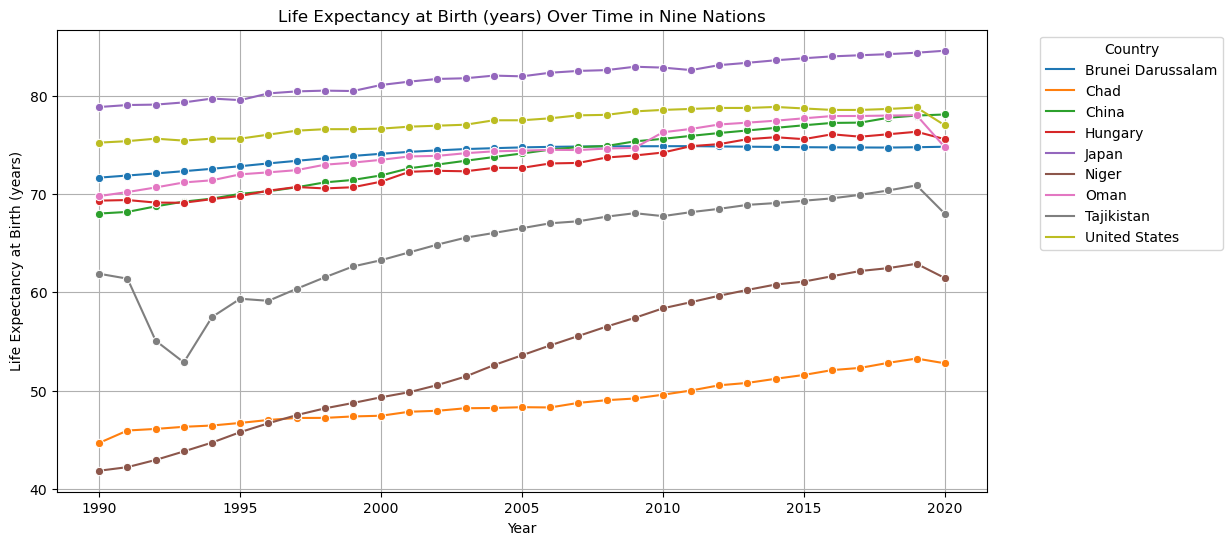

In [21]:
# Plot life expectancy at birth (LEB) over time for each country to see if there's an upward trend.
plt.figure(figsize=(12,6))
sns.lineplot(
    data=merged_df_sorted,
    x='Year',
    y='LEB',
    hue='Country',
    marker='o'
)
plt.title('Life Expectancy at Birth (years) Over Time in Nine Nations')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (years)')
plt.legend(
    title='Country',
    bbox_to_anchor=(1.05, 1),
)
plt.grid(True)


plt.show()

**Analysis:**
- The general trend for life expectancy across all nine nations is upward, indicating improvements in healthcare and living conditions over time.
- Japan consistently has the highest life expectancy throughout the years.
- Chad has the lowest life expectancy, although it shows a steady increase.
- There are noticeable fluctuations for some countries, like Niger, where life expectancy dips in certain periods before rising again.
- The gap between countries with the highest and lowest life expectancies remains significant over the years.

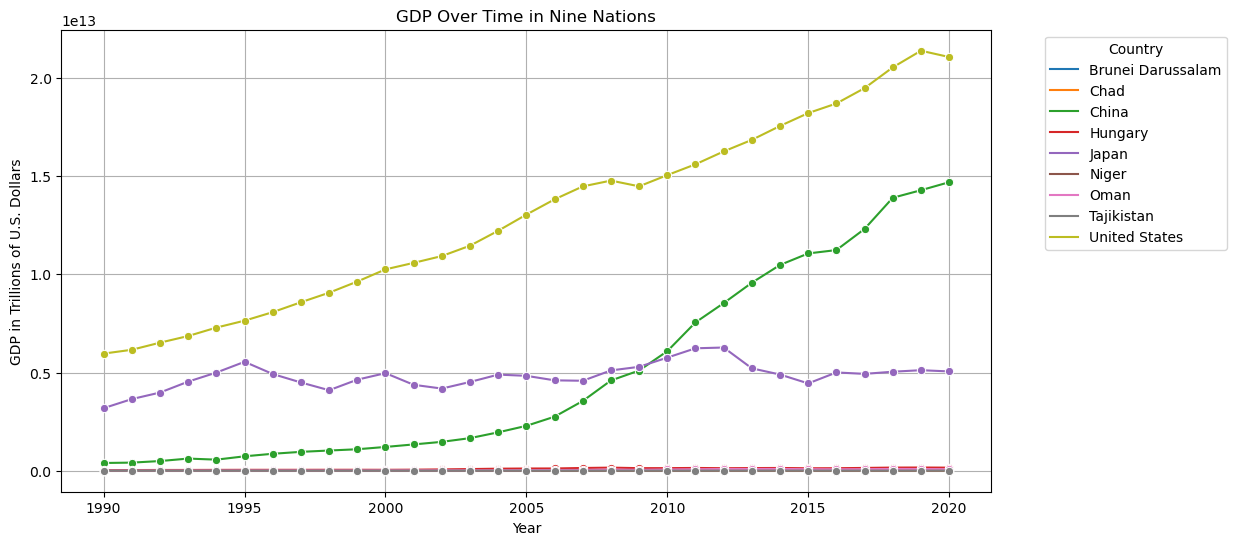

In [29]:
# Plot GDP over time for each country 
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=merged_df_sorted,
    x='Year',
    y='GDP',
    hue='Country',
    marker='o'
)
plt.title('GDP Over Time in Nine Nations')
plt.xlabel('Year')
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.legend(
    title='Country',
    bbox_to_anchor=(1.05, 1)
)
plt.grid(True)
plt.show()



**Analysis:**
- The GDP for all nations generally shows an increasing trend over time.
- The United States has the highest GDP, significantly higher than the other countries, reflecting its large economy.
- China's GDP shows a sharp increase, particularly from the mid-2000s, highlighting its rapid economic growth.
- Countries like Chad and Niger have relatively low GDPs, which grow at a much slower rate compared to the United States and China.
- The growth patterns suggest varying levels of economic development and industrialization among these nations.

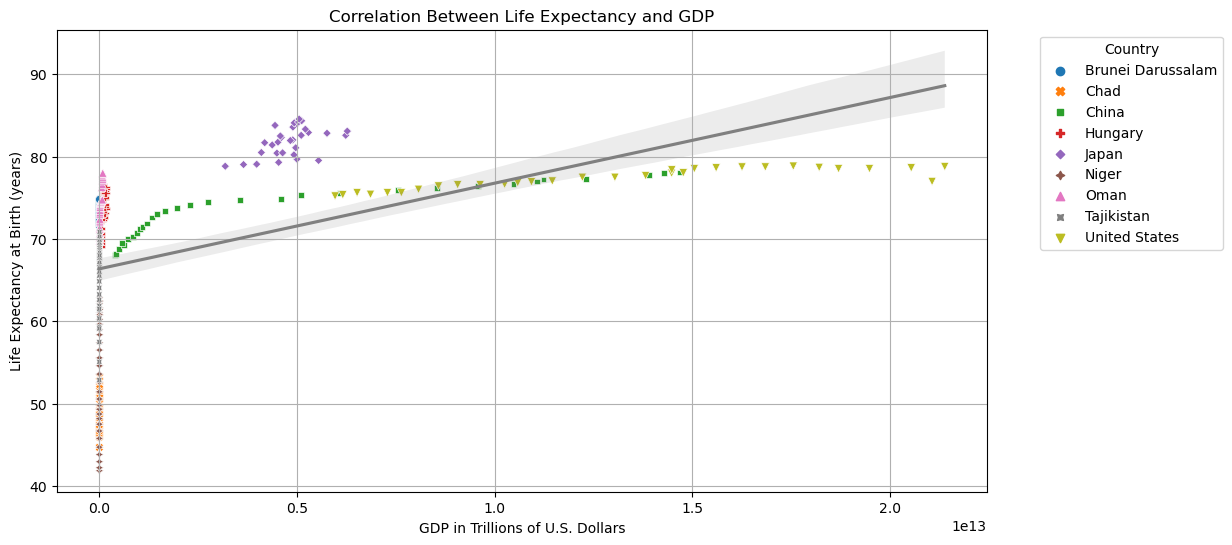

In [28]:
# Scatter plot with regression line to show correlation between GDP and life expectancy 
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=merged_df_sorted,
    x='GDP',
    y='LEB',
    hue='Country',
    style='Country'
)
sns.regplot(
    data=merged_df_sorted,
    x='GDP',
    y='LEB',
    scatter=False,
    color='gray'
)
plt.title('Correlation Between Life Expectancy and GDP')
plt.xlabel('GDP in Trillions of U.S. Dollars')
plt.ylabel('Life Expectancy at Birth (years)')
plt.legend(
    title='Country',
    bbox_to_anchor=(1.05, 1)
    
)
plt.grid(True)
plt.show()

**Analysis:**
- The scatter plot shows a positive correlation between GDP and life expectancy, indicating that countries with higher GDPs tend to have higher life expectancies.
- There is a clear linear trend, with the regression line highlighting the overall positive relationship.
- Countries like Japan and the United States, with higher GDPs, have life expectancies above 75 years.
- Countries with lower GDPs, like Chad and Niger, tend to have lower life expectancies.
- This correlation suggests that economic prosperity can be linked to better health outcomes and longer life spans.

**Analysis:**
- The bar plot shows the average life expectancy for each of the nine nations.
- Japan has the highest average life expectancy, around 82 years, indicating its advanced healthcare system and high standard of living.
- Chad has the lowest average life expectancy, around 49 years, reflecting challenges in healthcare access and living conditions.
- Countries like the United States, Oman, and Brunei Darussalam also have high average life expectancies, above 74 years.
- There is a significant disparity between the highest and lowest averages, highlighting global inequalities in health and development.

             Country        LEB
0  Brunei Darussalam  74.058645
1               Chad  48.878581
2              China  73.595452
3            Hungary  72.793454
4              Japan  81.865460
5              Niger  53.339774
6               Oman  74.421000
7         Tajikistan  64.908065
8      United States  77.312510


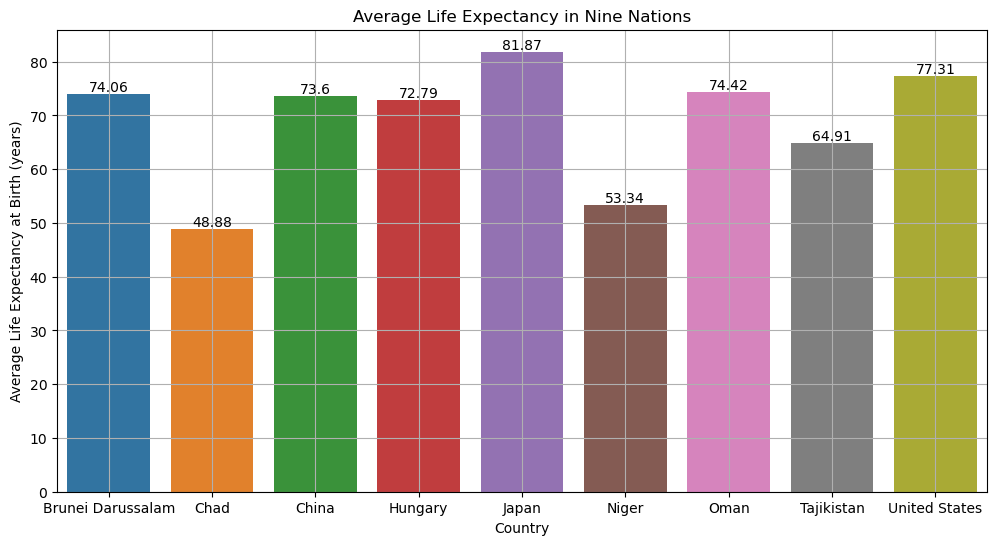

In [24]:
# Calculate and plot average life expectancy for each country 
average_life_expectancy = merged_df_sorted.groupby('Country')['LEB'].mean().reset_index()
print(average_life_expectancy)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=average_life_expectancy,
    x='Country',
    y='LEB'
)
plt.title('Average Life Expectancy at Birth (years)')
plt.title('Average Life Expectancy in Nine Nations')
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy at Birth (years)')
plt.grid(True)

# Annotate the mean LEB on the plot
for i in range(len(average_life_expectancy)):
    plt.text(i, average_life_expectancy['LEB'][i] + 0.5, round(average_life_expectancy['LEB'][i], 2), ha='center')


plt.show()








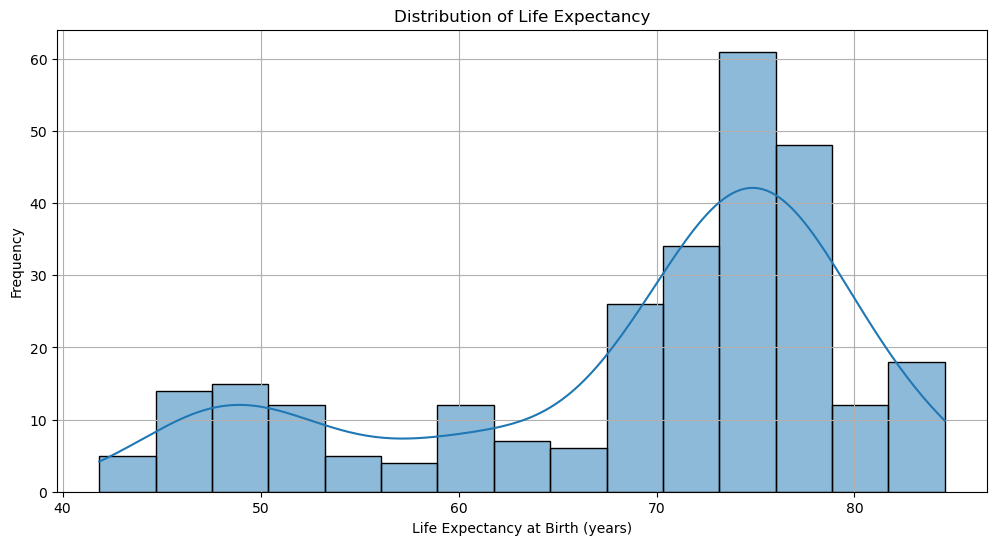

In [25]:
# Plot the distribution of life expectancy 
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df_sorted,
            x='LEB',
            kde=True,
            bins=15
           )

plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

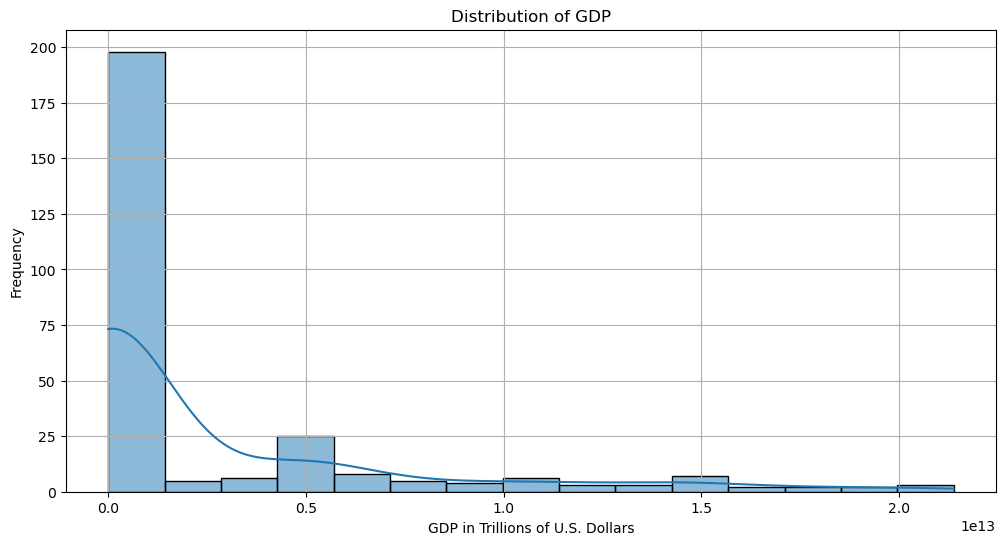

In [26]:
# Plot the distribution of GDP  
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df_sorted,
            x='GDP',
            kde=True,
            bins=15
           )

plt.title('Distribution of GDP')
plt.xlabel('GDP in Trillions of U.S. Dollars')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Analysis:**
- The distribution of GDP is heavily right-skewed.
- Most countries have a lower GDP, with a large number of observations clustered near the lower end of the GDP scale.
- The histogram shows a very high frequency of countries with GDP close to zero, indicating that many countries in the dataset have relatively small economies comapred to the United States of America.
- There are fewer countries with high GDP values, as seen from the decreasing frequency as GDP increases.
- The presence of some countries with extremely high GDPs (e.g., the United States) stretches the distribution, creating a long tail to the right.
    - This type of distribution can be described as a power law distribution. In a power law distribution, a small number of values (like GDPs) are very large, while most values are much smaller. This results in a few occurrences being extremely common and progressively fewer occurrences as the values increase.
- The skewed distribution suggests significant economic disparities among the countries in the dataset, with a few countries having very large economies while most have smaller ones.

## Summary of All Plots and Analysis

### 1. Distribution of Life Expectancy:
- Life expectancy ranges from approximately 40 to 85 years.
- The distribution has several peaks, with a significant one around 70 years.
- There is a right skew, with more countries having higher life expectancies.

### 2. Life Expectancy at Birth (years) Over Time in Nine Nations:
- Most countries show an upward trend in life expectancy over time.
- Japan has the highest life expectancy consistently, while Chad has the lowest.
- There are fluctuations for some countries, but the overall trend is positive.

### 3. GDP Over Time in Nine Nations:
- GDP generally increases over time for all countries.
- The United States and China show significant economic growth.
- Chad and Niger have the lowest GDPs, with slower growth rates.
- The disparity in economic development is evident from the varying growth patterns.

### 4. Correlation Between Life Expectancy and GDP:
- There is a positive correlation between GDP and life expectancy.
- Higher GDP tends to be associated with higher life expectancy.
- Economic prosperity appears linked to better health outcomes and longer life spans.

### 5. Average Life Expectancy at Birth (years):
- Japan has the highest average life expectancy, followed by the United States and Oman.
- Chad has the lowest average life expectancy.
- The differences highlight global health inequalities.

### 6. Distribution of GDP:
- The GDP distribution is right-skewed, with most countries having lower GDPs.
- A few countries have significantly higher GDPs, creating a long tail.
- This type of distribution could be described as a power law distribution.
- The distribution indicates significant economic disparities among the countries.


# Conclusions:

The visualizations effectively highlighted trends and relationships between GDP and life expectancy across nine nations.

The project was also able to answer the questions posed in the beginning:

- **Has life expectancy increased over time in the nine nations?**
    - Yes, life expectancy has generally increased over time in the nine nations. Japan had the highest life expectancy throughout, while Chad showed the greatest relative increase from a lower base.

- **Has GDP increased over time in the nine nations?**
    - Yes, GDP has increased for all countries in the dataset, with significant growth observed in China and the United States. Other countries, such as Chad and Niger, also showed growth, but at a slower rate.

- **Is there a correlation between GDP and life expectancy of a country?**
    - Yes, there is a positive correlation between GDP and life expectancy. Countries with higher GDPs tend to have higher life expectancies, indicating that economic prosperity is linked to better health outcomes.

- **What is the average life expectancy in these nations?**
    - The average life expectancy varied among the countries. Japan had the highest average at around 82 years, while Chad had the lowest at approximately 49 years. Other countries, such as the United States, Oman, and Brunei Darussalam, had averages in the mid-70s.

- **What is the distribution of that life expectancy?**
    - The distribution of life expectancy showed a right skew, with most observations clustered around the higher end. This indicates that while some countries have lower life expectancies, many have relatively high life expectancies.

- **What is the distribution of GDP?**
    - The distribution of GDP is heavily right-skewed, with most countries having lower GDPs. A few countries, such as the United States and China, have significantly higher GDPs, creating a long tail. This type of distribution is known as a power law distribution, which is common in economic data.

##### The visualizations and analyses provide a comprehensive overview of the trends and relationships between life expectancy and GDP in the nine nations. The data reveals improvements in life expectancy over time, a positive correlation between GDP and life expectancy, and significant economic disparities among the countries. These insights can help in understanding the impact of economic development on health outcomes (life expectancy at birth) and the challenges faced by lower-income nations.

# Further Research

While this project provided valuable insights into the relationships between GDP and life expectancy, there are several areas for further research:

- **Extended Time Series Analysis**:
  - Including more recent data could help in understanding the impact of recent global events, such as the COVID-19 pandemic, on GDP and life expectancy.

- **Regional and Cultural Factors**:
  - Analyzing how regional and cultural factors influence life expectancy and GDP growth could provide a deeper understanding of the disparities observed.

- **Healthcare Expenditure**:
  - Investigating the role of healthcare expenditure as a mediator between GDP and life expectancy could offer insights into how investments in healthcare impact health outcomes.

- **Income Inequality**:
  - Examining the impact of income inequality within countries on life expectancy could reveal important socio-economic dynamics.

- **Education and Employment**:
  - Exploring the influence of education levels and employment rates on life expectancy and GDP could provide a more holistic view of the factors contributing to economic and health outcomes.

- **Policy Implications**:
  - Studying the effects of different policy measures on GDP growth and life expectancy could help in formulating strategies to enhance both economic and health outcomes.

By addressing these areas, future research can build on the findings of this project to provide more comprehensive and actionable insights into the interplay between economic development and health.